In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , log_loss
from sklearn.datasets import make_circles
from tqdm import tqdm

(2, 100)
(1, 100)


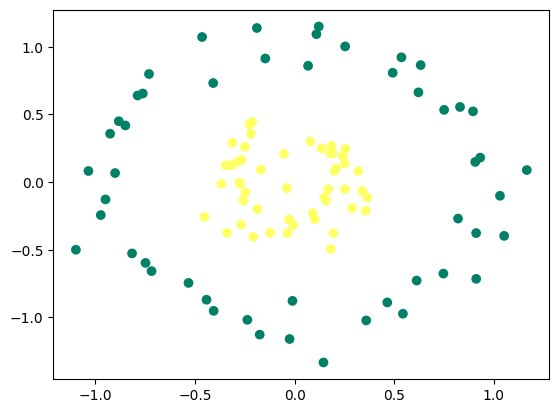

In [2]:
X , y = make_circles(n_samples = 100 , noise = 0.1 , factor = 0.3 , random_state = 0)
X = X.T
y = y.reshape((1 , y.shape[0]))

print(X.shape)
print(y.shape)

plt.scatter(X[0 , :] , X[1 , :] , c = y , cmap = 'summer')
plt.show()

In [3]:
#Initialisation
def initialisation(n0 , n1 , n2):
    
    W1 = np.random.randn(n1 , n0)
    b1 = np.random.randn(n1 , 1)
    W2 = np.random.randn(n2 , n1)
    b2 = np.random.randn(n2 , 1)
    
    params = {
        'W1' : W1 , 
        'b1' : b1 , 
        'W2' : W2 , 
        'b2' : b2
    }

    return params


In [10]:
#Forward Propagation
def forward_propagation(X , params):

    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    act = {
        'A1' : A1 , 
        'A2' : A2
    }

    return act

In [11]:
#Bacpropagation
def back_propagation(X , y , act , params):

    A1 = act['A1']
    A2 = act['A2']
    W2 = params['W2']

    m = y.shape[1]

    dZ2 = A2 - y 
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2 , axis = 1 , keepdims = True)

    dZ1 = W2.T.dot(dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1 , axis = 1 , keepdims = True)

    grad = {
        'dW1' : dW1 , 
        'db1' : db1 , 
        'dW2' : dW2 , 
        'db2' : db2
    }

    return grad

In [12]:
#Update
def update(grad , params , learning_rate):

    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    dW1 = grad['dW1']
    db1 = grad['db1']
    dW2 = grad['dW2']
    db2 = grad['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    params = {
        'W1' : W1 , 
        'b1' : b1 , 
        'W2' : W2 , 
        'b2' : b2
    }

    return params

In [13]:
#Prediction
def predict(X , params):
    act = forward_propagation(X , params)
    A2 = act['A2']
    return A2 >= 0.5

In [29]:
#Neural Network
def neural_network(X , y , n1 , learning_rate , n_iter):
    
    #Initialisaton
    n0 = X.shape[0]
    n2 = y.shape[0]
    params = initialisation(n0 , n1 , n2)

    train_loss = []
    train_acc = []

    #Gradient descente

    for i in tqdm(range(n_iter)):
        act = forward_propagation(X , params)
        grad = back_propagation(X , y , act , params)
        params = update(grad , params , learning_rate)

        if i%10 == 0:
            #Training
            A2 = act['A2']
            train_loss.append(log_loss(y , A2))
            y_pred = predict(X , params)
            current_accuracy = accuracy_score(y.flatten() , y_pred.flatten())
            train_acc.append(current_accuracy)
    
    plt.figure(figsize = (14 , 4))

    plt.subplot(1 , 2 , 1)
    plt.plot(train_loss , label = 'Train Loss')
    plt.legend()

    plt.subplot(1 , 2 , 2)
    plt.plot(train_acc , label = 'Train Acc')
    plt.legend()

    plt.show()

    return params

  0%|          | 0/100000 [00:00<?, ?it/s]/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to on

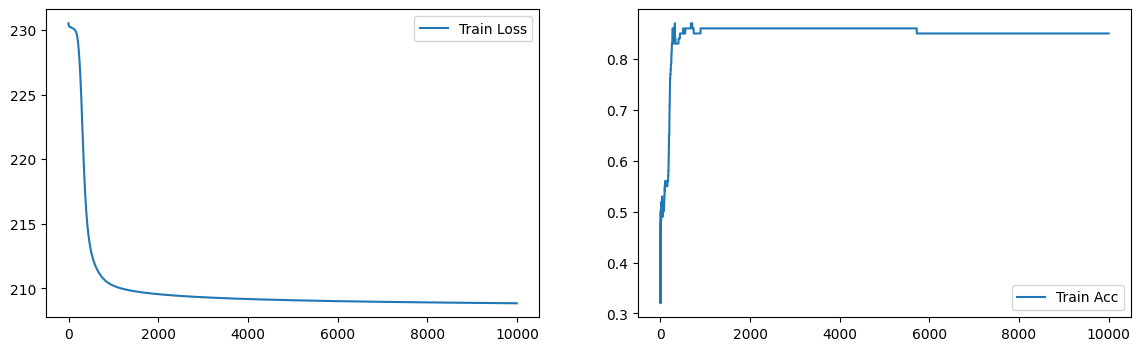

In [31]:
params = neural_network(X , y , n1 = 2 , learning_rate = 0.1 , n_iter = 100000)